### Why Transformation of Features Are Required?

1. Linear Regression---Gradient Descent ---- Global Minima
2. Algorithms like KNN, K-Means, Hierarcichal Clustering ----- Eucledian Distance

###### Every Point has some Vector and Directions

###### Deep Learning:(Standardization, Scaling)
1. ANN------Global Minima, Gradient Descent
2. CNN-----images(0-255, pixels) transform 0-1
3. RNN

   Ensemble techniqies dont require transformation, DT,RF,XGboost,Adaboost etc.

### Types of Transformation
1. Normalization and Standardization
2. Scaling to Minimum and Maximum values
3. Scaling to median and Quantiles
4. Gaussian Transformation

   Logarithmic Transformation
   
   Reciprocal Transformation
   
   Square Root Transformation
   
   Exponential transformation
   
   Box Cox Transformation

### Standardization  (Most common one)
We try to bring all the variables or features to similar scale. standardization means contering the variable at zero

z=(x-x_mean)/std

In [1]:
import pandas as pd

In [2]:

df = pd.read_csv('titanic_train.csv',usecols=['pclass', 'age','fare','survived'])
df.head()

,pclass,age,fare,survived
0,3,NaN,7.7333,1
1,3,38.0,8.6625,0
2,3,30.0,24.1500,0
3,2,54.0,23.0000,1
4,2,40.0,13.0000,0


In [3]:
df.age.fillna(df.age.median(),inplace=True)

In [4]:
df.isnull().sum()

pclass      0
age         0
fare        1
survived    0
dtype: int64

In [5]:
#### Standardization: We use the standardscaler from sklearn library
from  sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()  #it performs transformation of variable so we use fit_transform
### fit vs fit_transform (IQ)
df_scaled=scaler.fit_transform(df)

In [7]:
pd.DataFrame(df_scaled) 

,0,1,2,3
0,0.811420,-0.093041,-0.489610,1.309830
1,0.811420,0.676701,-0.472298,-0.763458
2,0.811420,0.060908,-0.183751,-0.763458
3,-0.381845,1.908287,-0.205177,1.309830
4,-0.381845,0.830649,-0.391486,-0.763458
...,...,...,...,...
845,-1.575110,1.985261,0.297858,-0.763458
846,-1.575110,2.216184,-0.080350,-0.763458
847,-0.381845,-0.400937,-0.149284,1.309830
848,0.811420,-2.017394,-0.377048,-0.763458


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([206.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 166.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 478.]),
 array([-1.5751096 , -1.45578311, -1.33645663, -1.21713014, -1.09780366,
        -0.97847718, -0.85915069, -0.73982421, -0.62049772, -0.50117124,
        -0.38184475, -0.26251827, -0.14319178, -0.0238653 ,  0.09546119,
         0.21478767,  0.33411416,  0.45344064,  0.57276713,  0.69209361,
         0.8114201 ]),
 <BarContainer object of 20 artists>)

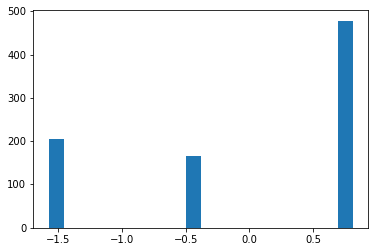

In [9]:
plt.hist(df_scaled[:,0],bins=20)  

(array([ 35.,  14.,  16.,  27.,  81.,  96., 258.,  86.,  65.,  35.,  23.,
         31.,  28.,  20.,  15.,  12.,   3.,   2.,   2.,   1.]),
 array([-2.23548527, -1.92823024, -1.62097522, -1.31372019, -1.00646517,
        -0.69921014, -0.39195511, -0.08470009,  0.22255494,  0.52980996,
         0.83706499,  1.14432002,  1.45157504,  1.75883007,  2.06608509,
         2.37334012,  2.68059515,  2.98785017,  3.2951052 ,  3.60236022,
         3.90961525]),
 <BarContainer object of 20 artists>)

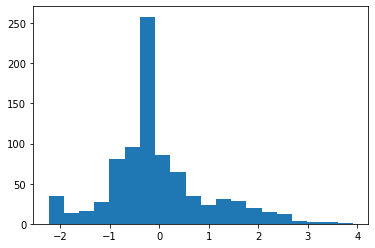

In [10]:
plt.hist(df_scaled[:,1],bins=20) 

(array([543., 144.,  71.,  34.,  13.,  14.,   3.,   0.,  14.,   1.,   9.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.63368878, -0.15642991,  0.32082896,  0.79808783,  1.27534671,
         1.75260558,  2.22986445,  2.70712332,  3.18438219,  3.66164106,
         4.13889993,  4.6161588 ,  5.09341768,  5.57067655,  6.04793542,
         6.52519429,  7.00245316,  7.47971203,  7.9569709 ,  8.43422977,
         8.91148865]),
 <BarContainer object of 20 artists>)

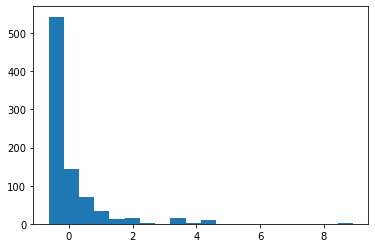

In [11]:
plt.hist(df_scaled[:,2],bins=20) #fare right skewed

(array([543., 144.,  71.,  34.,  13.,  14.,   3.,   0.,  14.,   1.,   9.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

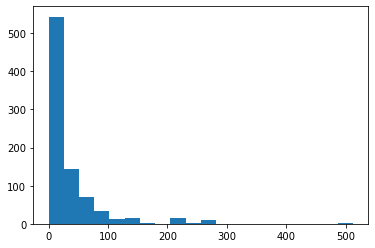

In [12]:
plt.hist(df['fare'],bins=20)

### Min Max Scaling (CNN)---and  Deep Learning Technique
    Min max Scaling the values between 0 to 1.
    X_scaled = (X - X.min / X.max - X.min)
    



In [13]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()

,pclass,age,fare,survived
0,1.0,0.348643,0.015094,1.0
1,1.0,0.473904,0.016908,0.0
2,1.0,0.373695,0.047138,0.0
3,0.5,0.674321,0.044893,1.0
4,0.5,0.498956,0.025374,0.0


(array([206.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 166.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 478.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

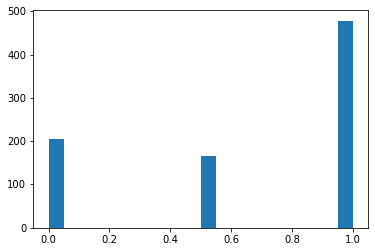

In [14]:
plt.hist(df_minmax['pclass'],bins=20)

(array([ 35.,  14.,  16.,  27.,  81.,  96., 258.,  86.,  65.,  35.,  23.,
         31.,  28.,  20.,  15.,  12.,   3.,   2.,   2.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

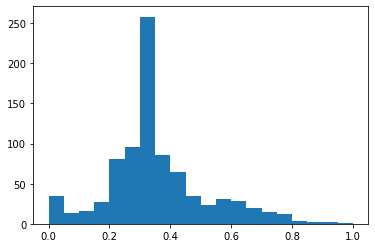

In [15]:
plt.hist(df_minmax['age'],bins=20)

(array([543., 144.,  71.,  34.,  13.,  14.,   3.,   0.,  14.,   1.,   9.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

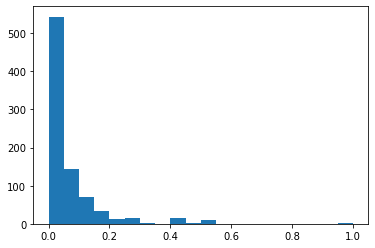

In [16]:
plt.hist(df_minmax['fare'],bins=20)  #outlier at 10th 

### Robust Scaler 
    it is used to scale the features to median and quantiles
    Scaling using median and quantile consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile diff is the diff between the 75th and 25th quantile:
    
    IQR = 75th qunatile - 25th quantile
    
    X_scaled = (X - X.median) / IQR
    

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9

1-10 percentile---10% of all values in this group is less then 1

4-10...


In [17]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()                                   #shift + tab for documentation and TAB for autocomplete
df_robust_scl = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scl.head()

,pclass,age,fare,survived
0,0.0,0.000000,-0.275924,1.0
1,0.0,0.776699,-0.235706,0.0
2,0.0,0.155340,0.434627,0.0
3,-1.0,2.019417,0.384852,1.0
4,-1.0,0.932039,-0.047970,0.0


(array([ 35.,  14.,  16.,  27.,  81.,  96., 258.,  86.,  65.,  35.,  23.,
         31.,  28.,  20.,  15.,  12.,   3.,   2.,   2.,   1.]),
 array([-2.16180971, -1.85177748, -1.54174524, -1.23171301, -0.92168078,
        -0.61164854, -0.30161631,  0.00841592,  0.31844816,  0.62848039,
         0.93851262,  1.24854485,  1.55857709,  1.86860932,  2.17864155,
         2.48867379,  2.79870602,  3.10873825,  3.41877049,  3.72880272,
         4.03883495]),
 <BarContainer object of 20 artists>)

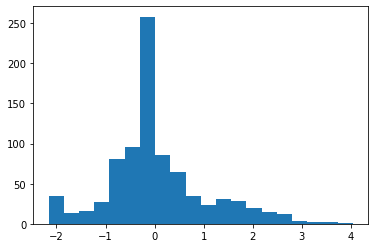

In [18]:
plt.hist(df_robust_scl['age'],bins=20)

(array([543., 144.,  71.,  34.,  13.,  14.,   3.,   0.,  14.,   1.,   9.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.61063789,  0.49809818,  1.60683426,  2.71557033,  3.8243064 ,
         4.93304248,  6.04177855,  7.15051463,  8.2592507 ,  9.36798677,
        10.47672285, 11.58545892, 12.69419499, 13.80293107, 14.91166714,
        16.02040322, 17.12913929, 18.23787536, 19.34661144, 20.45534751,
        21.56408359]),
 <BarContainer object of 20 artists>)

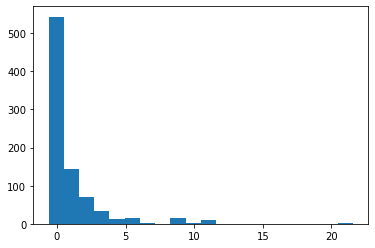

In [19]:
plt.hist(df_robust_scl['fare'],bins=20)

### Gaussian Transformation (basically mean Normal Distribution)
     Some ML algorithms like Linear and Logistic assume that the features are normally distributed
     -Accuracy
     -performance

1. Logarithmic Transformation---(for skewed)
2. Reciprocal Transformation
3. Square Root Transformation
4. Exponential transformation---(more general, we can use any exponent)
5. Box Cox Transformation

In [20]:
df = pd.read_csv('titanic_train.csv', usecols=['age','fare','survived'])

In [21]:
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [22]:
df.age = df['age'].fillna(df['age'].median())

In [23]:
df.age = df['age'].fillna(df['age'].median())

In [24]:
df.isnull().sum()

age         0
fare        1
survived    0
dtype: int64

#### if you want to check whether the feature is Gaussian or Normal Distributed
#### we use Q-Q Plot

In [25]:
import scipy.stats as stat # for Q-Q plot
import pylab

In [26]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    

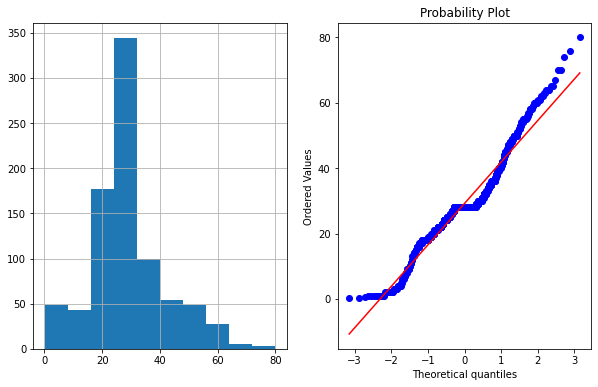

In [27]:
plot_data(df,'age')

### Logrithmic Transformation

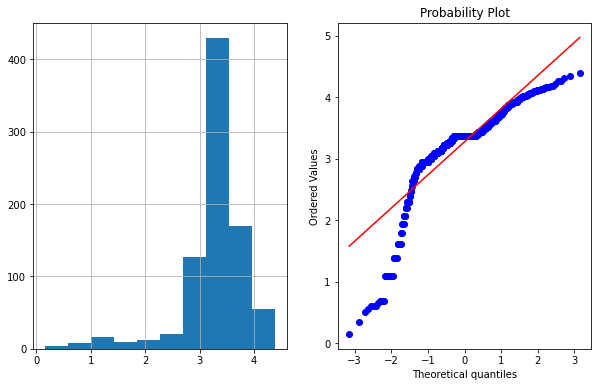

In [28]:
import numpy as np
df['age_log'] = np.log1p(df['age'])   
plot_data(df,'age_log')


#### Reciprocal Transformation (Reverse)


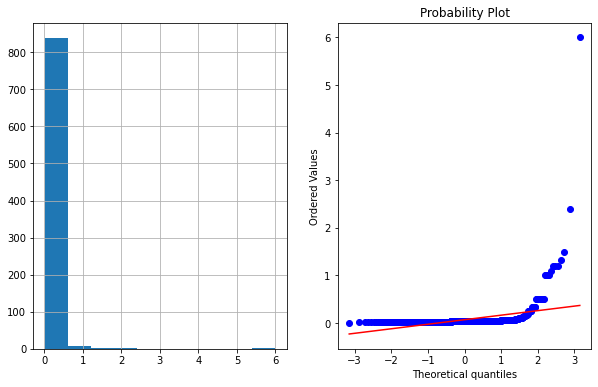

In [29]:
df['age_rec'] = 1/df.age
plot_data(df,'age_rec')

#### Make sure the data does not have (for these abv stats to perform otherwise gives error)

Null/None

""/empty string

Too many zeros (0)

float('inf') or float('-inf')

In [30]:
df[np.isfinite(df['age_rec'])]     

,age,fare,survived,age_log,age_rec
0,28.0,7.7333,1,3.367296,0.035714
1,38.0,8.6625,0,3.663562,0.026316
2,30.0,24.1500,0,3.433987,0.033333
3,54.0,23.0000,1,4.007333,0.018519
4,40.0,13.0000,0,3.713572,0.025000
...,...,...,...,...,...
845,55.0,50.0000,0,4.025352,0.018182
846,58.0,29.7000,0,4.077537,0.017241
847,24.0,26.0000,1,3.218876,0.041667
848,3.0,13.7750,0,1.386294,0.333333


#### Square Root Transformation

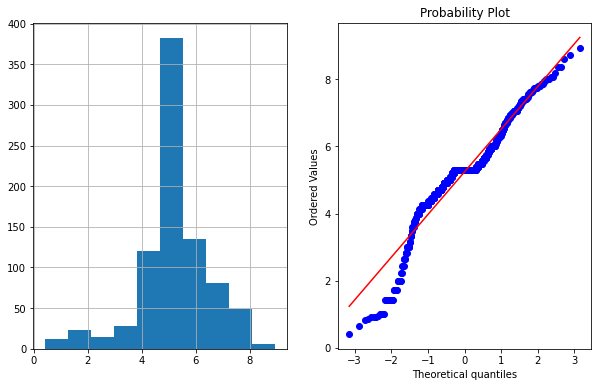

In [31]:
df['age_sq'] = df.age**(1/2)
plot_data(df,'age_sq')

#### Exponential Transformation

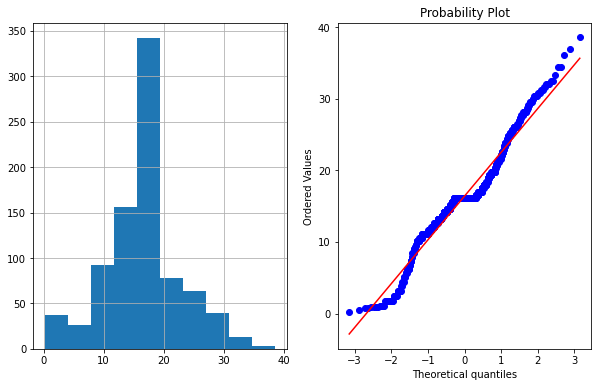

In [32]:
df['age_expo'] = df.age**(1/1.2)
plot_data(df,'age_expo')

#### Box Cox Transformation

The box cox transformation is defined as 

T(Y) = (Y exp(lembda)-1)/lembda

where Y is response variable 

and Lembda is the transformation parameter, Lembda varies from -5 to 5.

In the transformation, all values of lembda are considered and the optional value for a given variable is selected.

In [33]:
df['age_boxcox'],parameters = stat.boxcox(df['age'])

In [34]:
print(parameters)

0.7706329165332146


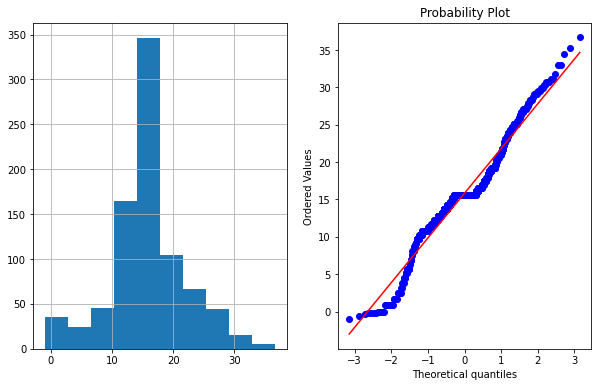

In [35]:
plot_data(df,'age_boxcox')

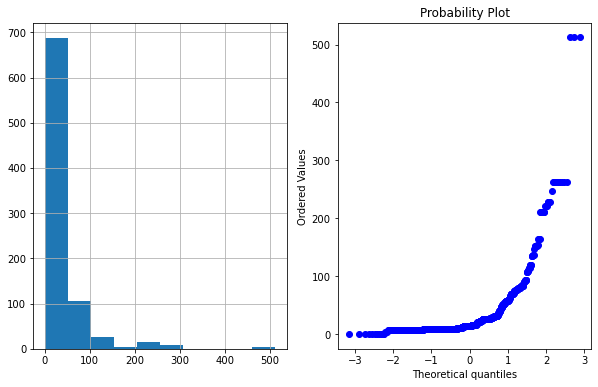

In [37]:
plot_data(df,'fare')  #right skewed

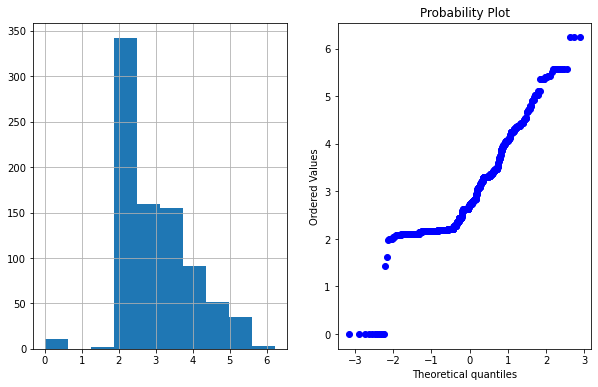

In [43]:
df['fare_log'] = np.log1p(df.fare)   #log1p to avoid the error of log 0 or tiny arguments
plot_data(df,'fare_log')

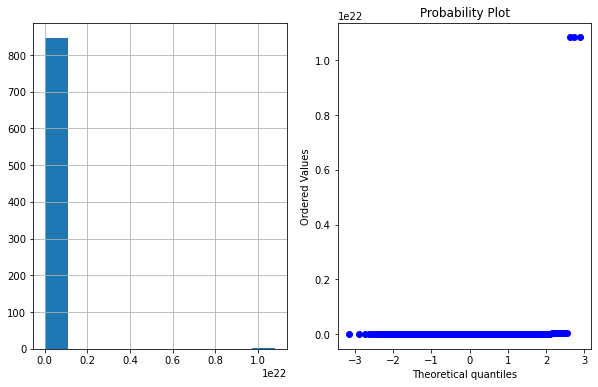

In [44]:
df['fare_boxcox'],parameters = stat.boxcox(df['fare']+1)   #erorr:Data must be positive. use +1
plot_data(df,'fare_boxcox')